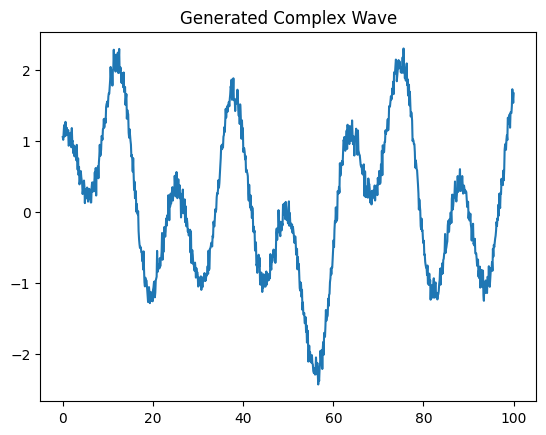

C:\Users\agusm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2985 - val_loss: 0.0311
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0272 - val_loss: 0.0189
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0200 - val_loss: 0.0194
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174 - val_loss: 0.0161
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0178 - val_loss: 0.0149
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - val_loss: 0.0141
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - val_loss: 0.0147
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - val_loss: 0.0158
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0142 - val_loss: 0.0140
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - val_loss: 0.0137
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0147 - val_loss: 0.0138
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - val_l

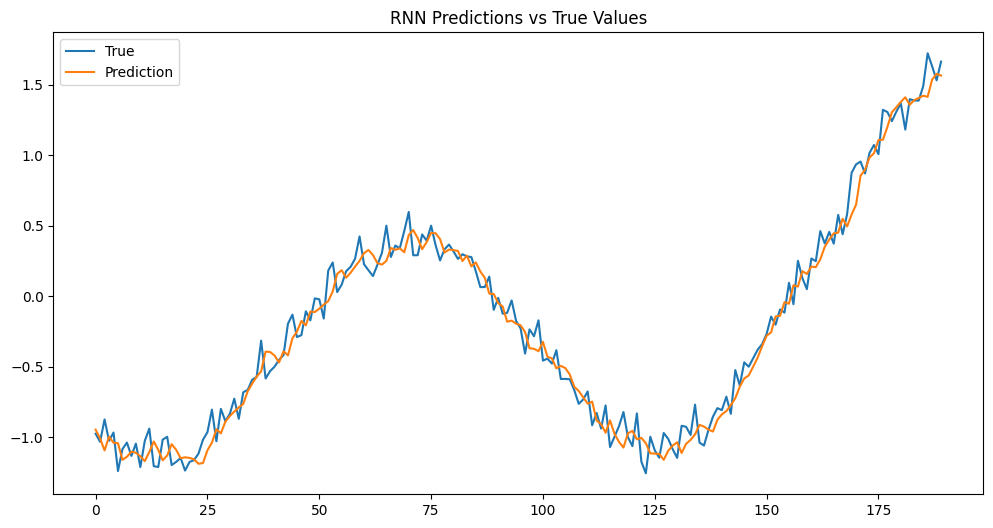

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Set random seed for reproducibility
np.random.seed(42)

# Generate a complex wave with noise
def generate_complex_wave(T, n):
    x = np.linspace(0, T, n)
    y = np.sin(0.2 * x) + np.cos(0.5 * x) + 0.5 * np.sin(0.1 * x) + 0.1 * np.random.randn(n)
    return x, y

# Parameters
T = 100  # Time period
n = 1000  # Number of points

x, y = generate_complex_wave(T, n)

# Plot the generated complex wave
plt.plot(x, y)
plt.title("Generated Complex Wave")
plt.show()

# Prepare the data for RNN
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Parameters
seq_length = 50

# Create sequences
X, y = create_sequences(y, seq_length)

# Reshape data to fit the RNN input shape [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and testing data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Plot predictions against true values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.title('RNN Predictions vs True Values')
plt.legend()
plt.show()
